## Grover algorithm

The Grover algorithm is widely used for unstructured search challenges. In this case it will be used find the right values of variables within a mathematical expression.

First, we will use the Classiq build-in Gover algorithm, to show how easy it can be to create a Grover algorithm with Classiq. Next, you will create your own implementation from scratch.

The following code implements grover search algorithm with 1 repetition for finding solutions to the equation: `2 * a = b`

In [1]:
from classiq import *

VAR_SIZE = 4


class ArithVars(QStruct):
    a: QNum[VAR_SIZE, False, 0]
    b: QNum[VAR_SIZE, True, 0]  # signed variable


@qfunc
def arith_formula(x: QArray[QNum[VAR_SIZE, False, 0], 2], res: QBit):
    res ^= 2 * x[0] == x[1]


@qfunc
def main(x: Output[ArithVars]):
    allocate(x.size, x)
    grover_search(
        reps=1,
        oracle=lambda vars: phase_oracle(arith_formula, vars),
        packed_vars=x,
    )


grover_model = create_model(main)
qprog = synthesize(grover_model)
show(qprog)

# Let's build our naive implementation of grover

We are going to create a Grover algorithm that will find integer values that solve this equation: `2 * a = b`.

This is the circuit that we want to create:
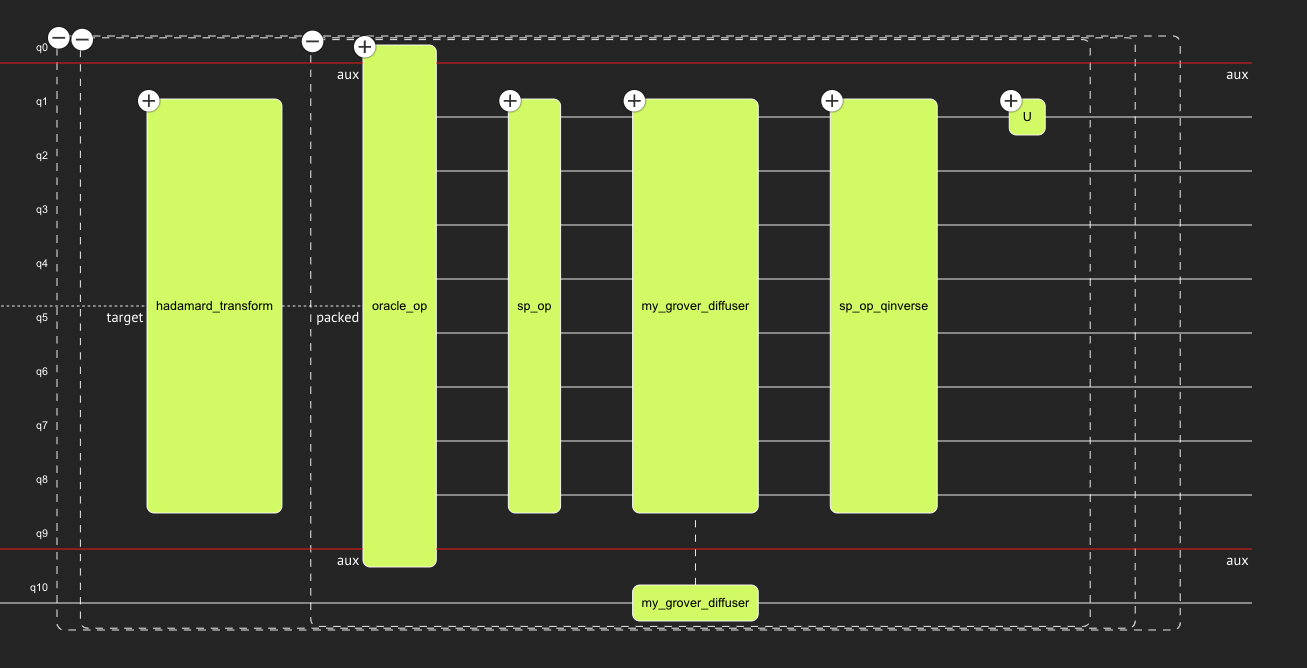


The goal is to create this circuit in the Classiq SDK. This implementation will not utilize all possible functions of the Classiq    SDK for learning purposes.

These are the steps we will follow

1. Create two-qubit arrays that will hold the values of the solution - will be done in step 5
2. Place the qubits in an equal superposition
3. Create the Grover Oracle
4. Create the Grover Diffuser
5. Bring everything together
6. Execute the circuit


### 2. Create a Hadamard transform function
Fill out the function below that will apply an H gate on each of the qubits that are passed to the function.
Use the `repeat` function to apply the H gate to all the qubits. 

Here are some helpful: [Code examples](#Helpfull-code-examples)

<details>
<summary>If you do not have enough time click here for a shortcut</summary>

You can use the build in the `hadamard_transform(q: qbit[])`

</details>

In [2]:
from classiq import *


@qfunc
def my_hadamard_transform(reg: QArray[QBit]):
    # Your code
    pass

### 3. Create the Grover Oracle

The Grover oracle will encode the arithmetic expression into the quantum circuit. We will use an in-place-xor to implement the quantum predicate, you do not have to manually do this. The part of the algorithm that we will create is seen in the image here:

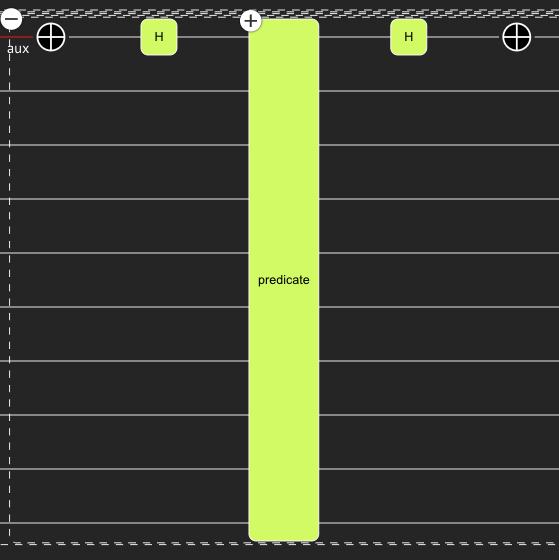

Here are some helpful: [Code examples](#Helpfull-code-examples)

In the `prepare_minus` function
1. Add gates to the input qubit to prepare a minus state.

In the `my_oracle` function
1. Create and allocate a qubit named `aux`
2. Use `within_apply` to first compute the minus state, then as an action apply `my_predicate`


In [3]:
@qfunc
def my_predicate(res: QNum, a: QNum, b: QNum) -> None:
    res ^= 2 * a == b * a


@qfunc
def prepare_minus(aux: QBit):
    # Your code here
    pass


@qfunc
def my_oracle(a: QNum, b: QNum):
    # Your code here
    pass

### 4. Create the Grover Diffuser

The Grover diffuser is an important part of the Grover Algorithm. Below is an image of how the diffuser looks. On the left, you see the input `a` and `b` registers.

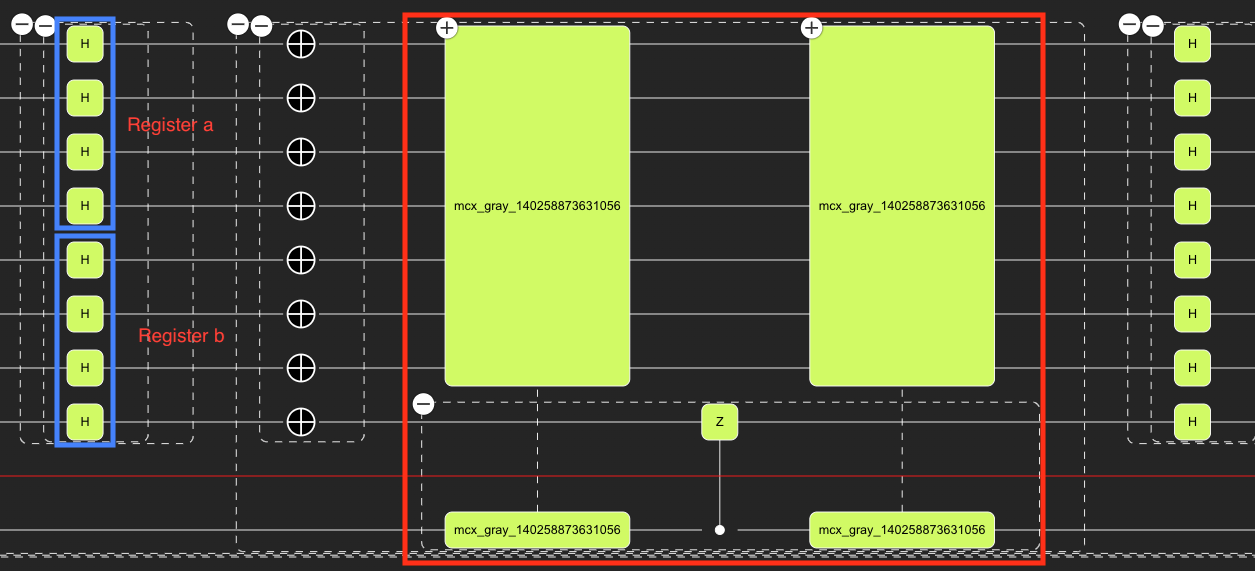

Here are some helpful: [Code examples](#Helpfull-code-examples)

This function should have these steps:
1. Apply the state prep (All `H` gates) to the input registers
2. Apply `X` gates to all inputs
3. Apply a controlled `Z` gate on the last qubit of the input qubits. The controlled part should be all the other qubits passed to the function
4. Apply the invert of state preparation (All `H` gates), on the registers

<details>
<summary>
Detailed instructions
</summary>

1. Create a new register called `reg` of type `QArray`
2. Create a temporary `QArray` register called `msbs` and a temporary `QBit` called `lsb`; no need to allocate them yet.
2. Join the `a` and `b` input into the new `reg` using the `bind()` function
3. Apply the inverse of `my_hadamard_transform()` to the register
4. Apply the `X` gate to each of the qubits in the register using the `apply_to_all()` function
5. Split the `reg` into `msbs` and `lsb`, you will allocate n-1 qubits to `msbs` and the other to `lsb`
6. Create a control function, this takes two named parameters:
    - `ctrl` this will take the `msbs` 
    - `stmt_block` this will take an anonymous function which a `Z` operation on the `lsb` qbit
7. join the `msbs` and `lsb` together in the `reg`
8. Apply the invert of the `my_hadamard_transform()` on the register using the `invert()` function
9. split the register back into `a` and `b` using the `bind()` function.

</details>



In [4]:
@qfunc
def my_diffuser(a: QNum, b: QNum):
    # Your code here
    pass

### 5. Brining everything together

1. Allocate 4 qubits into the `a` and `b` variable
2. apply your `my_hadamard_transform()` on both `a` and `b`
3. apply `my_oracle()` on `a` and `b`
4. apply `my_diffuser()` on `a` and `b`
5. synthesize the model and execute in the Ide

In [5]:
@qfunc
def main(
    # a: Output[QNum],
    # b: Output[QNum]
) -> None:
    #     #Your code here
    pass


model = create_model(main)
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/d995422b-118a-4915-8ba3-8d25ce05633e?version=0.41.0.dev39%2B79c8fd0855


### 6. Execute the ciruit

1. When the circuit opens in the IDE, press "Execute". 
2. Pick the "simulator" from the "Classiq" provider.
3. Execute the job.
4. Validate the results.
<details>
<summary>
The result should look something like this:
</summary>

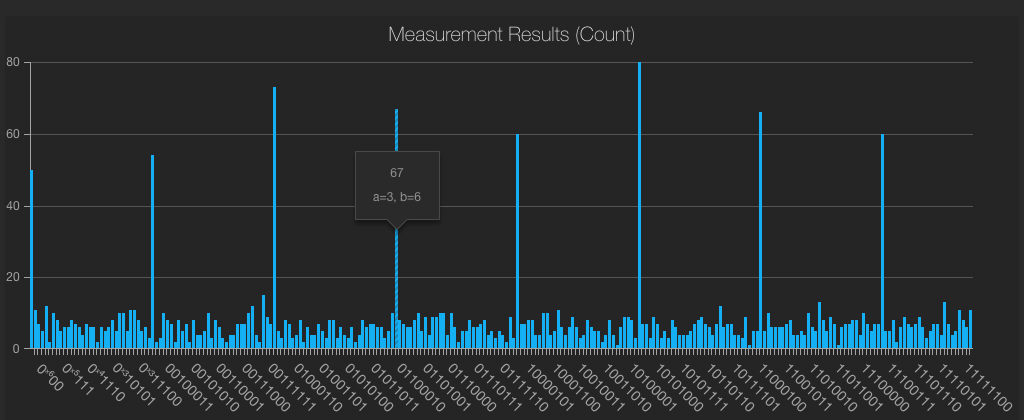

</details>

As you can see there are various, right answers to the equation. When you hover over the high count bars you see the integer results from that specific shot.


### 7. Hardware aware synthesis

With the Classiq synthesis engine we can create optimized quantum circuits for each quantum computer. Let's synthesize specifically for IONQ Aria and IBM Cairo to see the difference in implementation of the model that you created. [Here](https://docs.classiq.io/latest/user-guide/synthesis/hardware-aware-synthesis/) is the documentation for the hardware aware synthesis. Please compare the different circuits when you synthesize for two providers.

1. `backend_service_provider="IBM Quantum", backend_name="ibm_torino"`
2. `backend_service_provider="Azure Quantum", backend_name="ionq.qpu.aria-1"`


In [6]:
# Your code here

### 8. Optimize the circuit using Classiq optimization

#### Minimize number of qubits

When you have created your model, the Classiq synthesis engine can create a logical circuit from that model. We can steer the engine to optimize the circuit for specific preferences. 


Firstly, let's look at the statistics of the created circuit above. 

```
circuit_detail = GeneratedCircuit.from_qprog(qprog)

print(circuit_detail.data.width)
```
This shows that the circuit uses **11** qubits. Let's see if we can reduce that number by instructing the synthesis engine to optimize for a minimal number of qubits.

Before the `synthesize()` call, you can steer the Synthesis engine to optimize for a specific parameter. Use the `set_constraints(model, Constraints(...))` function to steer the synthesis engine to minimize the use of qubits. Now synthesize the circuit with the new constriants.

Validate that he created circuit only uses **10** qubits


In [7]:
# Your code here

### 9. Multiple Grover calls

In the Grover algorithm, you might want to apply the Grover oracle and diffuser multiple times when you have more variables/ more qubits.

Create it in multiple steps:

1. Create a new `qfunc` called `my_grover_search(a: QNum, b: QNum)`
2. Add the `my_oracle()` and `my_diffuser()` to the new function
3. In the main function, add a `repeat()` that will call the newly created function 2 times
4. validate everything works by executing the algorithm again in the IDE


In [8]:
@qfunc
def main(
    # a: Output[QNum],
    # b: Output[QNum]
):
    # Your code here
    pass


model = create_model(main)
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/1bd52eae-633b-4c5c-a26e-1706e6e3b3a4?version=0.41.0.dev39%2B79c8fd0855


### 10. Execute using Python

You might want to use the results from your quantum circuit in a later step of a larger program. In order to do so you might want to execute in Python, to get the results back in your quantum program. [Here](https://docs.classiq.io/latest/classiq_101/classiq_concepts/execute/) is the documentation for Execution.

Execute the program using the `Execute()` function and check the counts.

In [9]:
# Your code here

# Helpfull code examples

Create and allocate a variable, in this example allocate a single qubit into the zero state - possible variable types `QBit`, `QNum`, `QArray`
- ```
   foo = QBit('YOUR_QUBIT_NAME')
   allocate(1,foo)
   ```

Concatenate two Qubit registers
- ```
   new_reg = QArray('NEW_REG')
   bar = bind([foo, bar], new_reg)
   ```

Split a quantum register into two quantum registers. Let's assume there is a quantum register named `reg` with 8 qubits that you want to split into two separate registers of 4 qubits each
- ```
   foo = QArray("foo")
   bar = QArry("bar")
   bind(reg,[foo,bar])
   ```

Apply a gate to all qubits in a register, in this example apply the X gate to all qubits.
- ```
   apply_to_all(X, reg)
   ```

Apply an X gate to a qubit
- ```
   X(reg)
   ```

Apply an invert operation to a qubit
- ```
   invert(lamda: X(reg))
   ```

Apply a controlled operation to a qubit
- ```
   control(
        ctrl=reg,
        stmt_block=lambda: X(qubit),
    )
   ```

Apply an operation to each qubit in an array
- ```
   repeat(
    count= CInt,
    iteration= QCallable[CInt],
   )
   ```

### The full solution for your reference

In [10]:
@qfunc
def my_hadamard_transform(reg: QArray[QBit]):
    repeat(count=reg.len, iteration=lambda index: H(reg[index]))


@qfunc
def my_predicate(res: QNum, a: QNum, b: QNum) -> None:
    res ^= 2 * a == b


@qfunc
def prepare_minus(aux: QBit):
    X(aux)
    H(aux)


@qfunc
def my_oracle(a: QNum, b: QNum):
    aux = QBit("aux")
    allocate(1, aux)

    within_apply(
        within=lambda: prepare_minus(aux),
        apply=lambda: my_predicate(res=aux, a=a, b=b),
    )


@qfunc
def my_diffuser(a: QNum, b: QNum):
    reg = QArray("reg")
    msbs = QArray("msbs")
    lsb = QBit("lsb")
    bind([a, b], reg)
    my_hadamard_transform(reg)
    apply_to_all(gate_operand=X, target=reg)
    bind(reg, [msbs, lsb])
    control(ctrl=msbs, stmt_block=lambda: Z(lsb))
    bind([msbs, lsb], reg)
    invert(stmt_block=lambda: my_hadamard_transform(reg))
    bind(reg, [a, b])


@qfunc
def main(a: Output[QNum], b: Output[QNum]) -> None:

    allocate(4, a)
    allocate(4, b)
    my_hadamard_transform(a)
    my_hadamard_transform(b)
    my_oracle(a, b)
    my_diffuser(a, b)


model = create_model(main)
qprog = synthesize(model)
show(qprog)

Opening: https://platform.classiq.io/circuit/79b131ad-8ad1-4671-916c-661cf568bb43?version=0.41.0.dev39%2B79c8fd0855
